In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import time
from sklearn.model_selection import train_test_split

In [66]:
housing=pd.read_csv('Housing.csv')

In [67]:
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [68]:
def min_max(df,col):
    df[col]=(df[col]-np.min(df[col]))/(np.max(df[col])-np.min(df[col]))

In [69]:
housing["price"]=housing["price"]/10000000

In [70]:
housing.dtypes

price               float64
area                  int64
bedrooms              int64
bathrooms             int64
stories               int64
mainroad             object
guestroom            object
basement             object
hotwaterheating      object
airconditioning      object
parking               int64
prefarea             object
furnishingstatus     object
dtype: object

In [71]:
housing[["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea"]]=(housing[["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea"]]==["yes","yes","yes","yes","yes","yes"]).astype('int64')

In [72]:
(housing["furnishingstatus"]=="furnished")

0       True
1       True
2      False
3       True
4       True
       ...  
540    False
541    False
542    False
543     True
544    False
Name: furnishingstatus, Length: 545, dtype: bool

In [73]:
housing.loc[housing["furnishingstatus"] == "unfurnished", "furnishingstatus"] = 0
housing.loc[housing["furnishingstatus"] == "semi-furnished", "furnishingstatus"] = 1
housing.loc[housing["furnishingstatus"] == "furnished", "furnishingstatus"] = 2

In [74]:
housing["furnishingstatus"]=(housing["furnishingstatus"]).astype('int64')

In [75]:
min_max(housing,"area")
min_max(housing,"bedrooms")
min_max(housing,"bathrooms")
min_max(housing,"stories")
min_max(housing,"parking")
min_max(housing,"furnishingstatus")

In [76]:
#housing.area=housing.area

In [77]:
housing.dtypes

price               float64
area                float64
bedrooms            float64
bathrooms           float64
stories             float64
mainroad              int64
guestroom             int64
basement              int64
hotwaterheating       int64
airconditioning       int64
parking             float64
prefarea              int64
furnishingstatus    float64
dtype: object

In [78]:
y=housing.iloc[:,0:1]
y

,price
0,1.330000
1,1.225000
2,1.225000
3,1.221500
4,1.141000
...,...
540,0.182000
541,0.176715
542,0.175000
543,0.175000


In [79]:
X=housing.iloc[:,1:13]
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,1.0
1,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,1.0
2,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,0.5
3,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,1.0
4,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.092784,0.2,0.000000,0.000000,1,0,1,0,0,0.666667,0,0.0
541,0.051546,0.4,0.000000,0.000000,0,0,0,0,0,0.000000,0,0.5
542,0.135395,0.2,0.000000,0.000000,1,0,0,0,0,0.000000,0,0.0
543,0.086598,0.4,0.000000,0.000000,0,0,0,0,0,0.000000,0,1.0


In [80]:
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.8,test_size=0.2, random_state=42)

In [81]:
numerical_X_train=X_train.values
numerical_X_train

array([[0.30, 0.40, 0.33, ..., 0.33, 0.00, 1.00],
       [0.38, 0.40, 0.33, ..., 1.00, 0.00, 0.50],
       [0.15, 0.20, 0.00, ..., 0.67, 0.00, 1.00],
       ...,
       [0.20, 0.40, 0.33, ..., 0.33, 0.00, 1.00],
       [0.16, 0.20, 0.00, ..., 0.00, 0.00, 0.00],
       [0.26, 0.40, 0.33, ..., 0.33, 0.00, 0.50]])

In [82]:
numerical_y_train=y_train.values


In [83]:
numerical_X_valid=X_test.values

In [84]:
numerical_y_valid=y_test.values

In [86]:
np.random.seed(42)
initial_w = np.random.rand(12)
initial_b = np.random.rand(1)[0]

In [87]:
def compute_cost(X,y,w,b):
    m=X.shape[0]
    cost=0.0
    for i in range(m):
        f_wb=np.dot(X[i],w)+b
        cost=cost+(f_wb-y[i])**2
    cost=cost/(2*m)
    return cost

In [88]:
def compute_gradient(X,y,w,b):
    m,n=X.shape
    dj_dw=np.zeros(n)
    dj_db=0.0
    cost=0.0
    for i in range(m):
        err=np.dot(X[i],w)+b-y[i]
        for j in range(n):
            dj_dw[j]+=(err*X[i,j])
        dj_db+=err
    dj_dw=dj_dw/m
    dj_db=dj_db/m
    
    return dj_dw,dj_db

In [89]:
#np.set_printoptions(formatter={'float': '{:0.2f}'.format})

In [90]:
def compute_gradient_descent(X,y,w,b,cost_function,gradient_function,iterations,alpha):
    
    J_hist=[]
    wlist=[]
    for i in range(iterations):
        dj_dw,dj_db=gradient_function(X,y,w,b)
        w=w-alpha*dj_dw
        b=b-alpha*dj_db   
        wlist.append(w.tolist())
        J_hist.append(cost_function(X, y, w, b).tolist())

        
        if i% math.ceil(iterations/ 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_hist[-1][0]}")
        
    return w, b, J_hist,wlist

In [91]:
iterations = 10000
alpha = 0.05

w_f, b_f, J_hist,wlist = compute_gradient_descent(numerical_X_train, numerical_y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    iterations,alpha)
print(f"b,w found by gradient descent: {b_f},{w_f} ")
m= numerical_X_train.shape[0]
for i in range(10):
    print(f"prediction: {(10000000*(np.dot(numerical_X_valid[i], w_f) + b_f))[0]:0.2f}, target value: {(10000000*numerical_y_valid[i])[0]:0.2f}")

/tmp/ipykernel_4479/147488112.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dj_dw[j]+=(err*X[i,j])


Iteration    0: Cost 1.8210386741080546
Iteration 1000: Cost 0.005380507835913068
Iteration 2000: Cost 0.004950868098336781
Iteration 3000: Cost 0.004874206743100974
Iteration 4000: Cost 0.0048558270964445625
Iteration 5000: Cost 0.00485117147020714
Iteration 6000: Cost 0.004849957183531447
Iteration 7000: Cost 0.004849634121521984
Iteration 8000: Cost 0.0048495469275227875
Iteration 9000: Cost 0.004849523141452208
b,w found by gradient descent: [0.18],[0.34 0.04 0.33 0.12 0.04 0.02 0.04 0.07 0.08 0.07 0.06 0.04] 
prediction: 5203448.54, target value: 4060000.00
prediction: 7256094.40, target value: 6650000.00
prediction: 3062443.72, target value: 3710000.00
prediction: 4559961.33, target value: 6440000.00
prediction: 3333654.92, target value: 2800000.00
prediction: 3563507.36, target value: 4900000.00
prediction: 5645958.01, target value: 5250000.00
prediction: 6414387.43, target value: 4543000.00
prediction: 2755126.06, target value: 2450000.00
prediction: 2669276.33, target value: 3

In [92]:
y_mean=np.mean(numerical_y_valid)
m=numerical_X_valid.shape[0]
c=compute_cost(numerical_X_valid,numerical_y_valid,w_f,b_f)
c=c*2*m
cost_mean=0.
for i in range(m):
    err_mean=(numerical_y_valid[i]-y_mean)**2
    cost_mean+=err_mean
r2=1-(c/cost_mean)
print(r2[0])
(c/(2*m))[0]

0.6495244526168287


0.008857516369398095

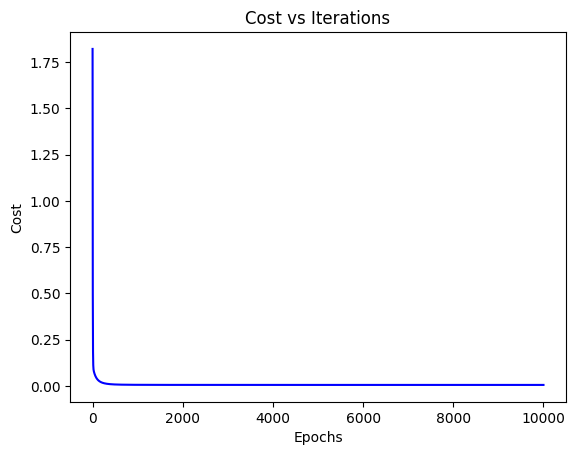

In [93]:
I=np.arange(1,10001).reshape(-1,1)
plt.plot(I,J_hist,color='blue')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()


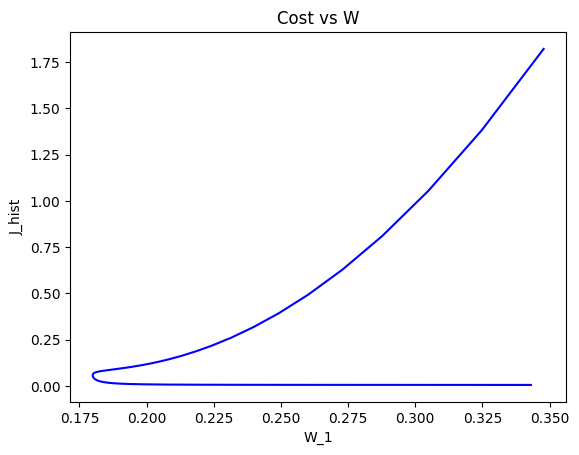

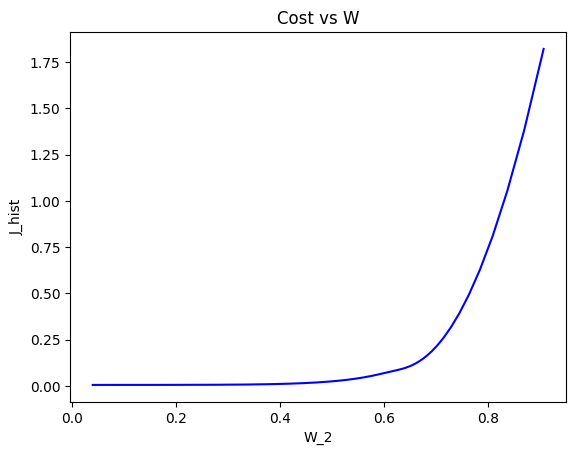

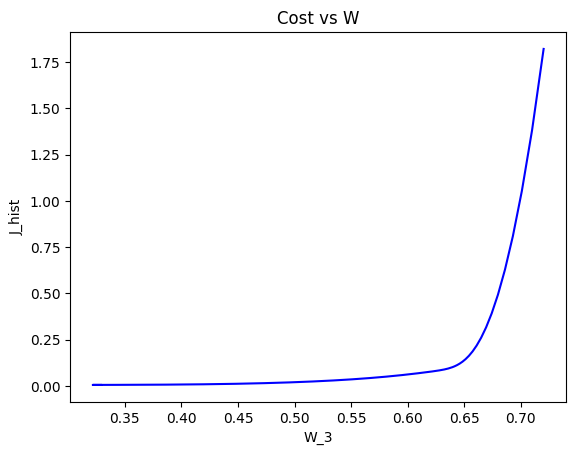

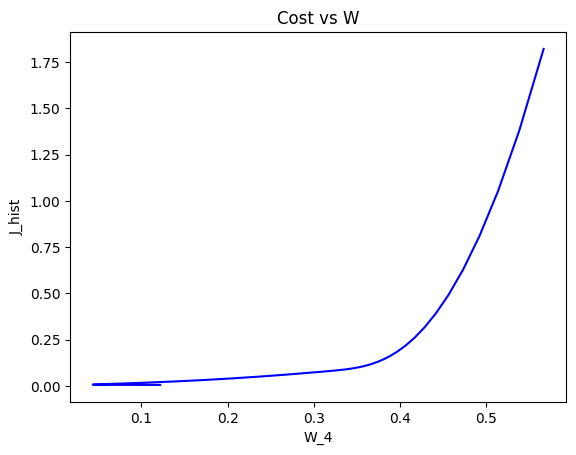

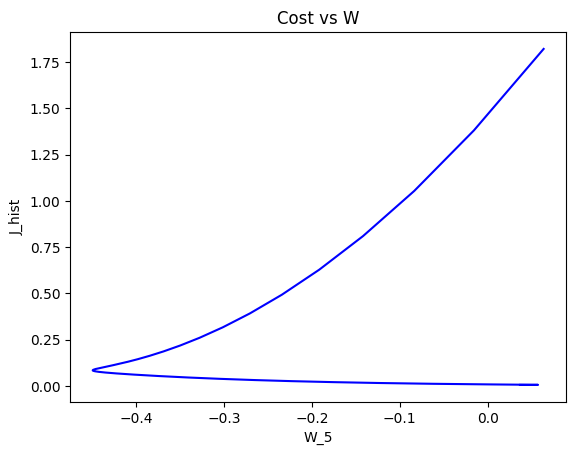

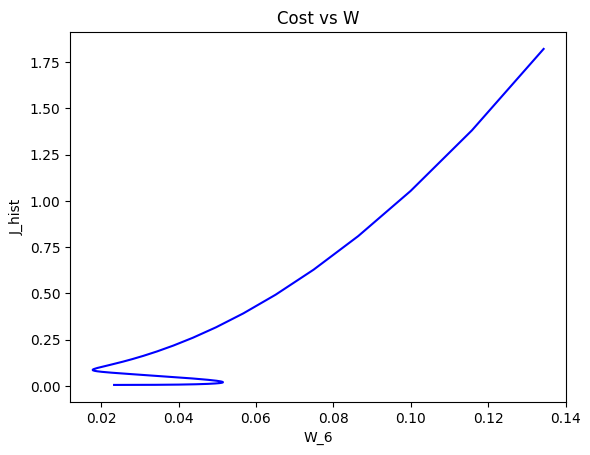

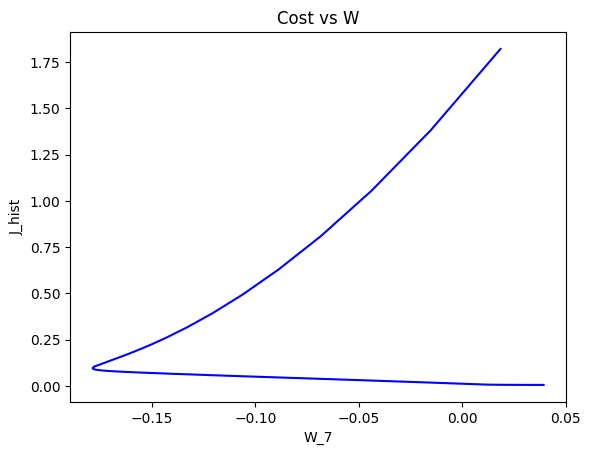

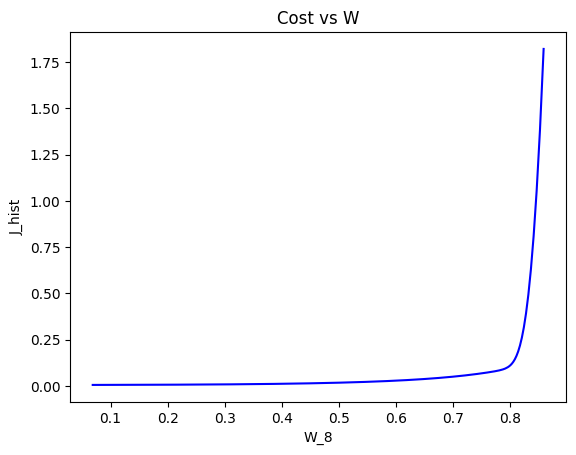

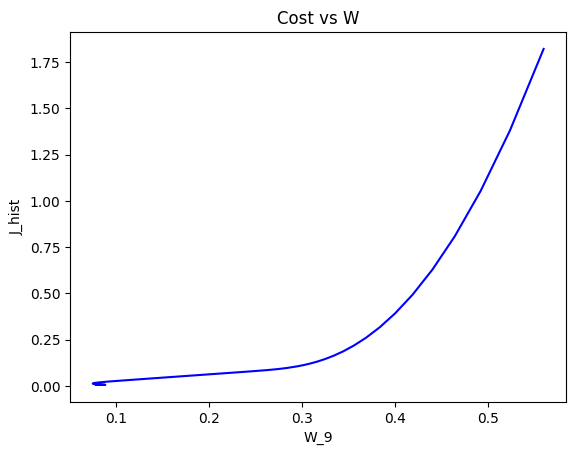

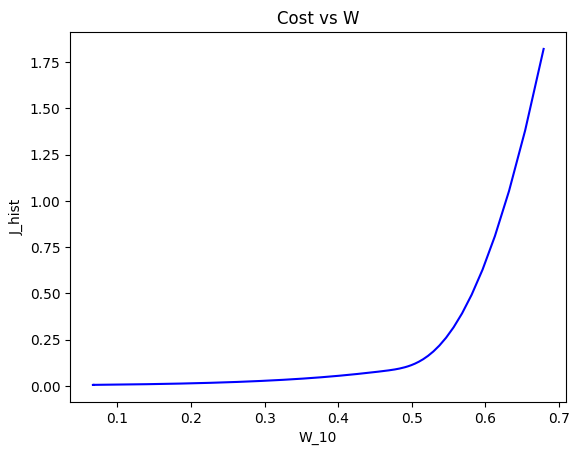

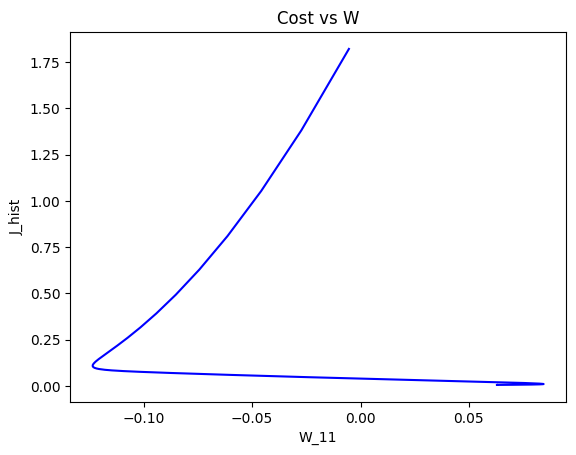

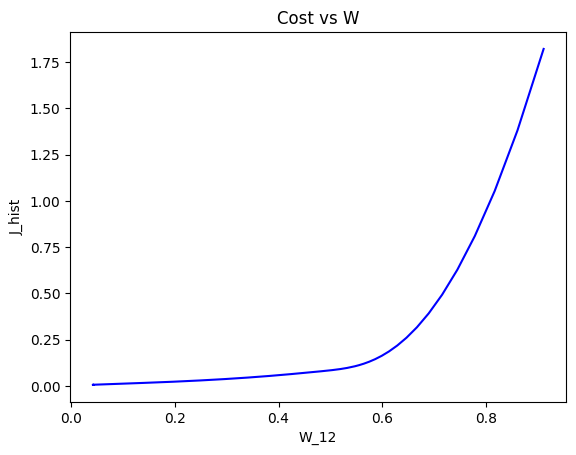

In [94]:
G=[]
F=[]
for i in range (12):
    for j in range (len(wlist)):
        F.append(wlist[j][i])
    G.append(F)
    F=[]
for i in range (len(G)):
    plt.plot(G[i],J_hist,color='blue')
    plt.xlabel(f"W_{i+1}")
    plt.ylabel('J_hist')
    plt.title('Cost vs W')
    plt.show()
    time.sleep(1)
    plt.close()
